# Data preparation

 **Cleaning and preparing data is a critical first step in any machine learning project**

**1) Load data**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('customer-churn-data_for-data-prep.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           978 non-null    object 
 1   Payment Method   996 non-null    object 
 2   Churn            898 non-null    object 
 3   LastTransaction  996 non-null    int64  
 4   Country          996 non-null    object 
 5   Province         427 non-null    object 
 6   BirthYear        982 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.6+ KB


In [4]:
df.describe(include = 'all')

,Gender,Payment Method,Churn,LastTransaction,Country,Province,BirthYear
count,978,996,898,996.000000,996,427,982.000000
unique,2,3,2,NaN,1,77,NaN
top,male,credit card,loyal,NaN,TH,Bangkok,NaN
freq,534,649,576,NaN,996,128,NaN
mean,NaN,NaN,NaN,111.072289,NaN,NaN,1972.036660
std,NaN,NaN,NaN,44.956045,NaN,NaN,19.600513
min,NaN,NaN,NaN,1.000000,NaN,NaN,1899.000000
25%,NaN,NaN,NaN,77.000000,NaN,NaN,1960.000000
50%,NaN,NaN,NaN,110.000000,NaN,NaN,1974.000000
75%,NaN,NaN,NaN,145.000000,NaN,NaN,1988.000000


**2) Drop unrelated variable**

It's a great idea to spend some time to familiarize ourselves with the columns in the dataset, to understand what each feature represents. This is important, because a poor understanding of the features could cause us to make mistakes in the data analysis and the modeling process.

In [5]:
df.head()

,Gender,Payment Method,Churn,LastTransaction,Country,Province,BirthYear
0,male,credit card,loyal,1,TH,Bangkok,1899.0
1,female,credit card,churn,3,TH,Bangkok,2000.0
2,male,credit card,loyal,6,TH,Non Nam Thaeng,1980.0
3,female,credit card,churn,7,TH,Ang Thong,1899.0
4,female,credit card,churn,11,TH,Bueng Kan,1985.0


In [6]:
df = df.drop(['LastTransaction'], axis=1)

In [7]:
df.head()

,Gender,Payment Method,Churn,Country,Province,BirthYear
0,male,credit card,loyal,TH,Bangkok,1899.0
1,female,credit card,churn,TH,Bangkok,2000.0
2,male,credit card,loyal,TH,Non Nam Thaeng,1980.0
3,female,credit card,churn,TH,Ang Thong,1899.0
4,female,credit card,churn,TH,Bueng Kan,1985.0


**3.1) Drop records with missing target**

Now, let's decide on the appropriate column to use as a target column for modeling

98

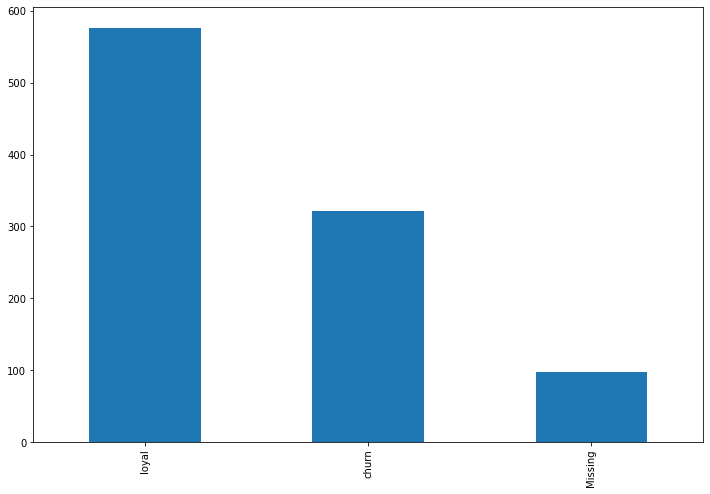

In [8]:
df['Churn'].fillna('Missing').value_counts().plot(kind='bar')
df['Churn'].isnull().sum()

In [9]:
df[df['Churn'].isnull()].head(5)

,Gender,Payment Method,Churn,Country,Province,BirthYear
8,male,cash,NaN,TH,Chaiyaphum,1996.0
14,female,credit card,NaN,TH,Kalasin,1992.0
19,NaN,credit card,NaN,TH,Khelang Nakhon,1978.0
24,female,credit card,NaN,TH,Maha Sarakham,1947.0
26,male,credit card,NaN,TH,Nakhon Nayok,1969.0


In [10]:
df = df.dropna(axis=0, subset=['Churn'])

0

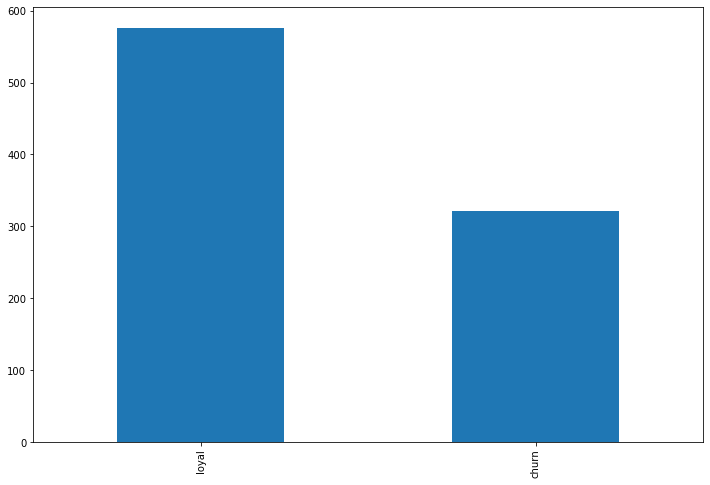

In [11]:
df['Churn'].fillna('Missing').value_counts().plot(kind='bar')
df['Churn'].isnull().sum()

In [12]:
df[df['Churn'].isnull()].head(5)

,Gender,Payment Method,Churn,Country,Province,BirthYear


In [13]:
df.head()

,Gender,Payment Method,Churn,Country,Province,BirthYear
0,male,credit card,loyal,TH,Bangkok,1899.0
1,female,credit card,churn,TH,Bangkok,2000.0
2,male,credit card,loyal,TH,Non Nam Thaeng,1980.0
3,female,credit card,churn,TH,Ang Thong,1899.0
4,female,credit card,churn,TH,Bueng Kan,1985.0


**3.2) Drop records with missing > 50%**

In [14]:
df.shape[0]

898

520
0.579064587973274


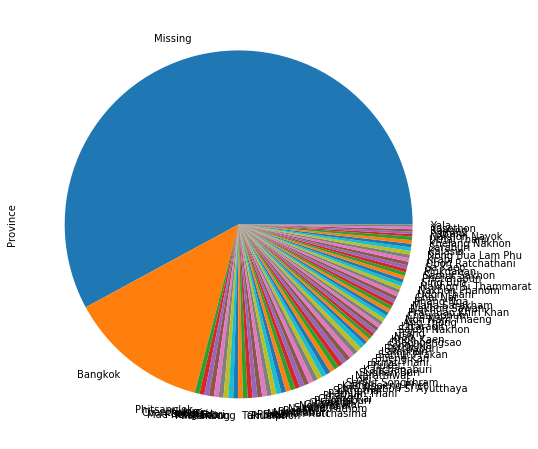

In [15]:
df['Province'].fillna('Missing').value_counts().plot(kind='pie')
print( df['Province'].isnull().sum() )
print( float(df['Province'].isnull().sum()) / df.shape[0] )

In [16]:
df[df['Province'].isnull()].head(5)

,Gender,Payment Method,Churn,Country,Province,BirthYear
427,male,credit card,loyal,TH,NaN,1996.0
428,male,credit card,loyal,TH,NaN,1978.0
429,male,credit card,loyal,TH,NaN,1938.0
431,female,credit card,loyal,TH,NaN,1967.0
432,female,cash,churn,TH,NaN,1975.0


In [17]:
df = df.drop(['Province'], axis=1)

In [18]:
df.head()

,Gender,Payment Method,Churn,Country,BirthYear
0,male,credit card,loyal,TH,1899.0
1,female,credit card,churn,TH,2000.0
2,male,credit card,loyal,TH,1980.0
3,female,credit card,churn,TH,1899.0
4,female,credit card,churn,TH,1985.0


**4) Drop single value inputs**

To wrap up this section, let's look for any columns that contain only one unique value and remove them. These columns won't be useful for the model since they don't add any information to each loan application. In addition, removing these columns will reduce the number of columns.

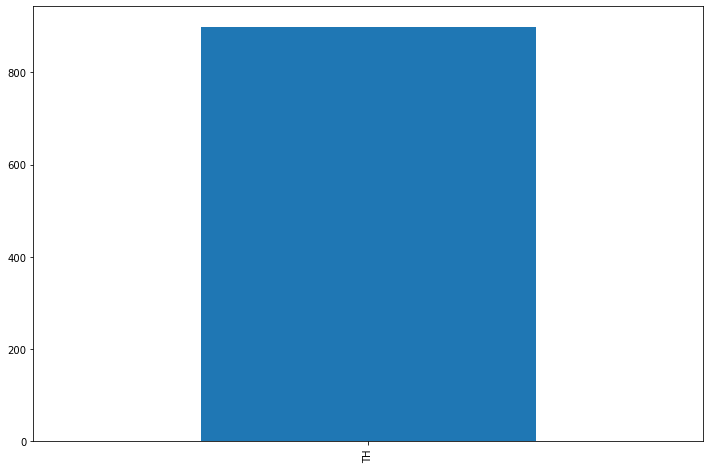

In [19]:
df['Country'].value_counts().plot(kind='bar')

In [20]:
df.head(5)

,Gender,Payment Method,Churn,Country,BirthYear
0,male,credit card,loyal,TH,1899.0
1,female,credit card,churn,TH,2000.0
2,male,credit card,loyal,TH,1980.0
3,female,credit card,churn,TH,1899.0
4,female,credit card,churn,TH,1985.0


In [21]:
df = df.drop(['Country'], axis=1)

In [22]:
df.head(5)

,Gender,Payment Method,Churn,BirthYear
0,male,credit card,loyal,1899.0
1,female,credit card,churn,2000.0
2,male,credit card,loyal,1980.0
3,female,credit card,churn,1899.0
4,female,credit card,churn,1985.0


**5) Impute missing values**

We need to handle missing values and categorical features before feeding the data into a machine learning algorithm, because the mathematics underlying most machine learning models assumes that the data is numerical and contains no missing values. To reinforce this requirement, scikit-learn will return an error if you try to train a model using data that contain missing values or non-numeric values when working with models like linear regression and logistic regression.

>5.1) Numeric variable (mean)

>Let's compute the number of missing values and determine how to handle them.






In [23]:
df.isnull().sum()

Gender            16
Payment Method     0
Churn              0
BirthYear         13
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 995
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          882 non-null    object 
 1   Payment Method  898 non-null    object 
 2   Churn           898 non-null    object 
 3   BirthYear       885 non-null    float64
dtypes: float64(1), object(3)
memory usage: 35.1+ KB


In [25]:
df[df['BirthYear'].isnull()].head(5)

,Gender,Payment Method,Churn,BirthYear
113,female,credit card,loyal,NaN
114,NaN,cash,loyal,NaN
115,male,credit card,loyal,NaN
116,female,credit card,loyal,NaN
118,male,cash,loyal,NaN


In [26]:
mean = round(df['BirthYear'].mean())
print(mean)

1972


In [27]:
df['BirthYear'] = df['BirthYear'].fillna(mean)

In [28]:
#No missing records
df[df['BirthYear'].isnull()].head(5)

,Gender,Payment Method,Churn,BirthYear


>5.2) Categorical variable (mode)

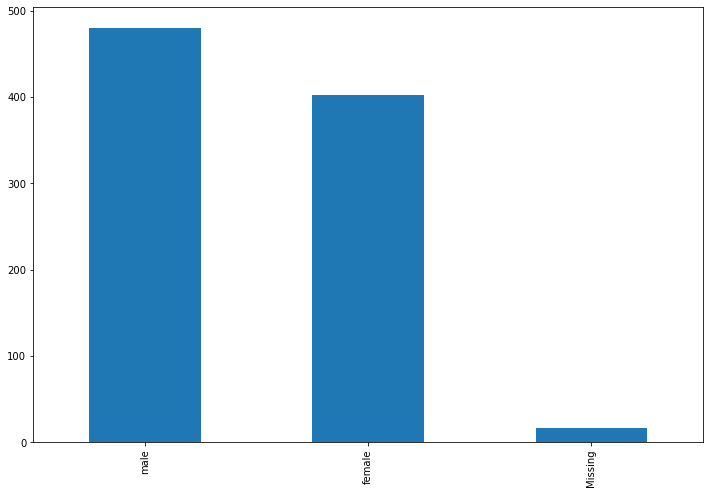

In [29]:
df['Gender'].fillna('Missing').value_counts().plot(kind='bar')

In [30]:
df[df['Gender'].isnull()].head(5)

,Gender,Payment Method,Churn,BirthYear
5,NaN,credit card,churn,1982.0
6,NaN,cheque,loyal,1985.0
18,NaN,credit card,loyal,1990.0
43,NaN,credit card,churn,1984.0
44,NaN,credit card,loyal,1965.0


In [31]:
mode = df['Gender'].mode()[0]
print(mode)

male


In [32]:
df['Gender'] = df['Gender'].fillna(mode)

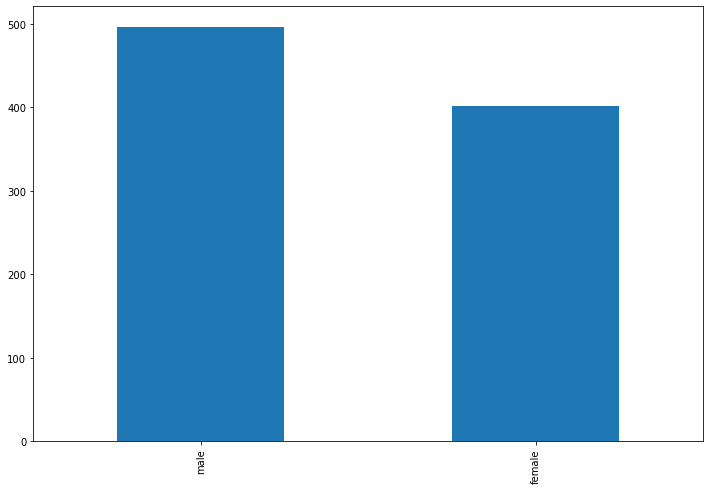

In [33]:
df['Gender'].fillna('Missing').value_counts().plot(kind='bar')

In [34]:
#no missing records
df[df['Gender'].isnull()].head(5)

,Gender,Payment Method,Churn,BirthYear


**6) Convert non-numeric to numeric variable**

First, let's understand the two types of categorical features we have in our dataset and how we can convert each to numerical features

>Keep in mind, the goal in this section is to have all the columns as numeric columns (int or float data type), and containing no missing values. We just dealt with the missing values, so let's now find out the number of columns that are of the object data type and then move on to process them into numeric form.


>6.1) Ordinal variable


In [35]:
df.head()

,Gender,Payment Method,Churn,BirthYear
0,male,credit card,loyal,1899.0
1,female,credit card,churn,2000.0
2,male,credit card,loyal,1980.0
3,female,credit card,churn,1899.0
4,female,credit card,churn,1985.0


In [36]:
conv_dict={'male':0,'female':1}
df['Gender']=df['Gender'].apply(conv_dict.get)

In [37]:
df.head()

,Gender,Payment Method,Churn,BirthYear
0,0,credit card,loyal,1899.0
1,1,credit card,churn,2000.0
2,0,credit card,loyal,1980.0
3,1,credit card,churn,1899.0
4,1,credit card,churn,1985.0


>6.2) Nominal variable

>These are regular categorical values. You can't order nominal values.

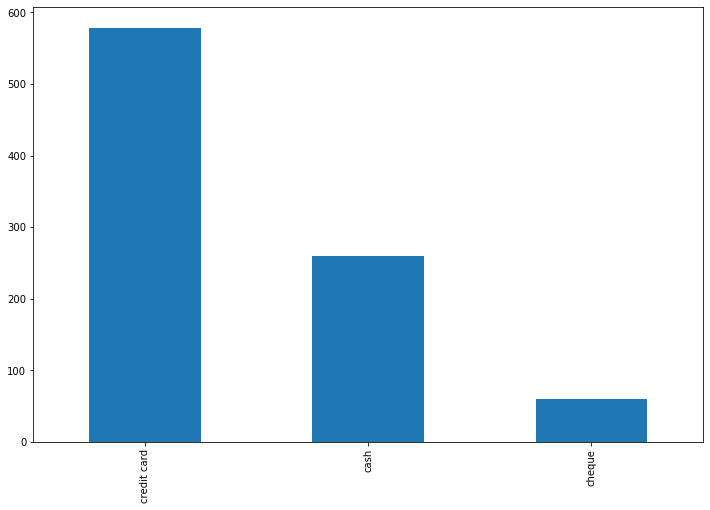

In [38]:
df['Payment Method'].value_counts().plot(kind='bar')

In [39]:
df.head(5)

,Gender,Payment Method,Churn,BirthYear
0,0,credit card,loyal,1899.0
1,1,credit card,churn,2000.0
2,0,credit card,loyal,1980.0
3,1,credit card,churn,1899.0
4,1,credit card,churn,1985.0


In [40]:
df['Payment Method'].unique()

array(['credit card', 'cheque', 'cash'], dtype=object)

In [41]:
df.groupby(['Payment Method']).size()

Payment Method
cash           259
cheque          60
credit card    579
dtype: int64

In [42]:
df.describe(include = 'all')

,Gender,Payment Method,Churn,BirthYear
count,898.000000,898,898,898.000000
unique,NaN,3,2,NaN
top,NaN,credit card,loyal,NaN
freq,NaN,579,576,NaN
mean,0.447661,NaN,NaN,1972.010022
std,0.497530,NaN,NaN,19.643731
min,0.000000,NaN,NaN,1899.000000
25%,0.000000,NaN,NaN,1960.000000
50%,0.000000,NaN,NaN,1974.000000
75%,1.000000,NaN,NaN,1988.000000


In [43]:
payMtd_df = pd.get_dummies(df['Payment Method'], prefix='PayMethd')
payMtd_df.head(5)

,PayMethd_cash,PayMethd_cheque,PayMethd_credit card
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [44]:
df = pd.concat([df, payMtd_df], axis=1)

In [45]:
df = df.drop(['Payment Method', 'PayMethd_cheque'], axis=1)

In [46]:
df.head(5)

,Gender,Churn,BirthYear,PayMethd_cash,PayMethd_credit card
0,0,loyal,1899.0,0,1
1,1,churn,2000.0,0,1
2,0,loyal,1980.0,0,1
3,1,churn,1899.0,0,1
4,1,churn,1985.0,0,1


**7) Create calculated variables**

A key part of any data science project is to do everything you can to understand the data.

In [47]:
df.head()

,Gender,Churn,BirthYear,PayMethd_cash,PayMethd_credit card
0,0,loyal,1899.0,0,1
1,1,churn,2000.0,0,1
2,0,loyal,1980.0,0,1
3,1,churn,1899.0,0,1
4,1,churn,1985.0,0,1


In [48]:
now = datetime.datetime.today().year
now

2020

In [49]:
df['age'] = now - df['BirthYear']

In [50]:
df.head()

,Gender,Churn,BirthYear,PayMethd_cash,PayMethd_credit card,age
0,0,loyal,1899.0,0,1,121.0
1,1,churn,2000.0,0,1,20.0
2,0,loyal,1980.0,0,1,40.0
3,1,churn,1899.0,0,1,121.0
4,1,churn,1985.0,0,1,35.0


In [51]:
df = df.drop(['BirthYear'], axis=1)

In [52]:
df.head()

,Gender,Churn,PayMethd_cash,PayMethd_credit card,age
0,0,loyal,0,1,121.0
1,1,churn,0,1,20.0
2,0,loyal,0,1,40.0
3,1,churn,0,1,121.0
4,1,churn,0,1,35.0


**8) Remove outlier**

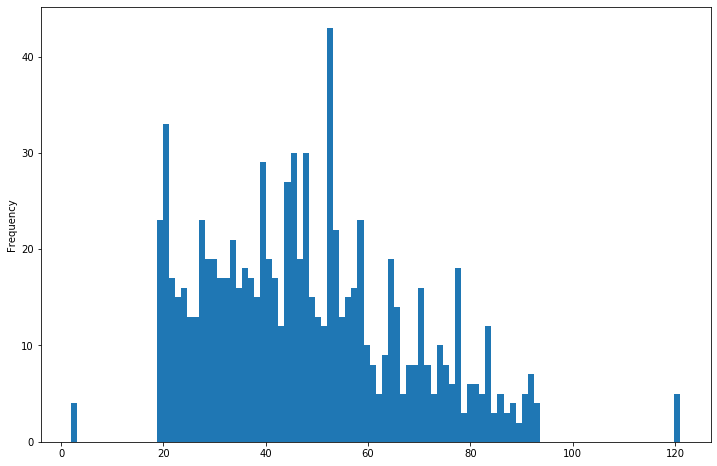

In [53]:
df['age'].plot.hist(bins=100, alpha=1)

In [54]:
df.head()

,Gender,Churn,PayMethd_cash,PayMethd_credit card,age
0,0,loyal,0,1,121.0
1,1,churn,0,1,20.0
2,0,loyal,0,1,40.0
3,1,churn,0,1,121.0
4,1,churn,0,1,35.0


In [55]:
df['z_age'] = stats.zscore(df['age'])

In [56]:
df.head()

,Gender,Churn,PayMethd_cash,PayMethd_credit card,age,z_age
0,0,loyal,0,1,121.0,3.718780
1,1,churn,0,1,20.0,-1.425675
2,0,loyal,0,1,40.0,-0.406971
3,1,churn,0,1,121.0,3.718780
4,1,churn,0,1,35.0,-0.661647


In [57]:
df['z_age'].min()

-2.3425085010581945

In [58]:
df['z_age'].max()

3.718779749022456

In [59]:
df = df[df['z_age'].abs() < 3]

In [60]:
df.head()

,Gender,Churn,PayMethd_cash,PayMethd_credit card,age,z_age
1,1,churn,0,1,20.0,-1.425675
2,0,loyal,0,1,40.0,-0.406971
4,1,churn,0,1,35.0,-0.661647
5,0,churn,0,1,38.0,-0.508841
6,0,loyal,0,0,35.0,-0.661647


In [61]:
df = df.drop(['z_age'], axis=1)

In [62]:
df.head()

,Gender,Churn,PayMethd_cash,PayMethd_credit card,age
1,1,churn,0,1,20.0
2,0,loyal,0,1,40.0
4,1,churn,0,1,35.0
5,0,churn,0,1,38.0
6,0,loyal,0,0,35.0


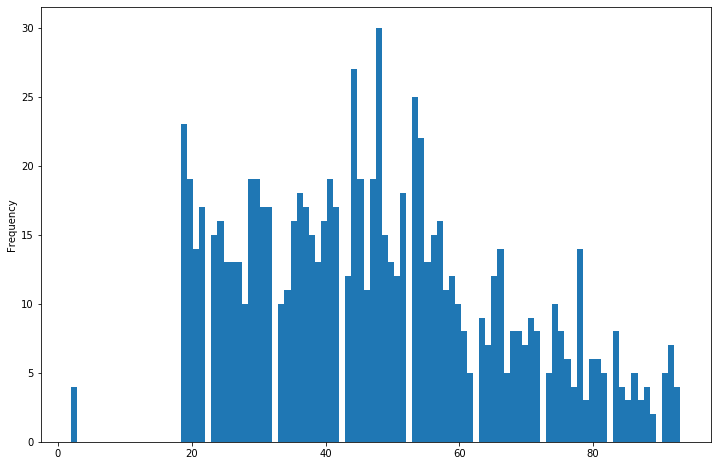

In [63]:
df['age'].plot.hist(bins=100, alpha=1)

In [64]:
df['age'].min()

2.0

In [65]:
df = df[df['age']> 0]

In [66]:
df.head()

,Gender,Churn,PayMethd_cash,PayMethd_credit card,age
1,1,churn,0,1,20.0
2,0,loyal,0,1,40.0
4,1,churn,0,1,35.0
5,0,churn,0,1,38.0
6,0,loyal,0,0,35.0


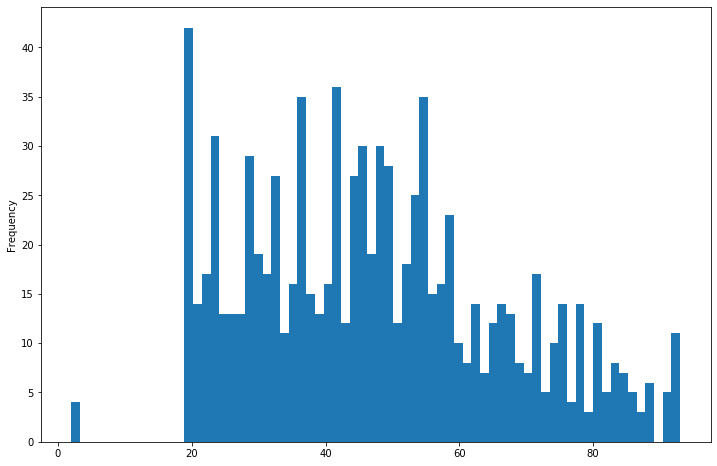

In [67]:
df['age'].plot.hist(bins=70, alpha=1)

**9) Save data**

In [68]:
df.to_csv('customer_churn_cleaned.csv', sep=',', encoding='utf-8')

In [69]:
!ls

In [70]:
!head -5 customer_churn_cleaned.csv 

'head' is not recognized as an internal or external command,
operable program or batch file.


In [71]:
df.describe(include = 'all')

,Gender,Churn,PayMethd_cash,PayMethd_credit card,age
count,893.000000,893,893.000000,893.000000,893.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,loyal,NaN,NaN,NaN
freq,NaN,572,NaN,NaN,NaN
mean,0.449048,NaN,0.288914,0.643897,47.581187
std,0.497676,NaN,0.453512,0.479115,18.920691
min,0.000000,NaN,0.000000,0.000000,2.000000
25%,0.000000,NaN,0.000000,0.000000,32.000000
50%,0.000000,NaN,0.000000,1.000000,46.000000
75%,1.000000,NaN,1.000000,1.000000,59.000000
